In [70]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import cv2
from myshow import myshow
import sys
from scipy.io import loadmat, savemat
import cardiacDicomGlobals as cdg
import pandas as pd
import seaborn as sns

In [71]:



df = pd.DataFrame()
ind = 0
for patient in cdg.patientList:
    
    
    inFileName = "B0CorrectedImages/"+patient.mfr+".mat"
    x = loadmat(inFileName)
    peakSignalMFI = np.transpose(x['peakSignalMFI'])    
    peakSignalSeg = np.transpose(x['peakSignalSeg'])    
    peakSignalUncorr = np.transpose(x['peakSignalUncorr'])    
    
    maxSigUncorr = np.transpose(x['maxSigUncorr'])    
    maxSigSeg = np.transpose(x['maxSigSeg'])    
    maxSigMFI = np.transpose(x['maxSigMFI'])    

    
    freqAxis = x['globalFreqSearch']  

    
    
    readout = patient.readout    
    longOrShort = 'long'
    if readout.find('short')>0:
        longOrShort = 'short'
    
    resonanceIndex = cdg.closestIndex(freqAxis,0)
    
    
    dataList = []
    metList = ['bicarbonate', 'lactate','pyruvate']
    labelList = ['uncorrected']*3
    methodList = ['gradient']*3
    dataList.append(peakSignalUncorr[resonanceIndex,0])
    dataList.append(peakSignalUncorr[resonanceIndex,1])
    dataList.append(peakSignalUncorr[resonanceIndex,2])
    
    metList.extend(['bicarbonate', 'lactate','pyruvate'])
    labelList.extend(['global shift only']*3)
    methodList.extend(['gradient']*3)
    dataList.append(peakSignalUncorr[:,0].max())
    dataList.append(peakSignalUncorr[:,1].max())
    dataList.append(peakSignalUncorr[:,2].max())
    
    metList.extend(['bicarbonate', 'lactate','pyruvate'])
    labelList.extend(['MFI']*3)
    methodList.extend(['gradient']*3)
    dataList.append(peakSignalMFI[:,0].max())
    dataList.append(peakSignalMFI[:,1].max())
    dataList.append(peakSignalMFI[:,2].max())
    
    metList.extend(['bicarbonate', 'lactate','pyruvate'])
    labelList.extend(['uncorrected']*3)
    methodList.extend(['peak signal']*3)
    dataList.append(maxSigUncorr[resonanceIndex,0])
    dataList.append(maxSigUncorr[resonanceIndex,1])
    dataList.append(maxSigUncorr[resonanceIndex,2])
    
    metList.extend(['bicarbonate', 'lactate','pyruvate'])
    labelList.extend(['global shift only']*3)
    methodList.extend(['peak signal']*3)
    dataList.append(maxSigUncorr[:,0].max())
    dataList.append(maxSigUncorr[:,1].max())
    dataList.append(maxSigUncorr[:,2].max())
    
    metList.extend(['bicarbonate', 'lactate','pyruvate'])
    labelList.extend(['MFI']*3)
    methodList.extend(['peak signal']*3)
    dataList.append(maxSigMFI[:,0].max())
    dataList.append(maxSigMFI[:,1].max())
    dataList.append(maxSigMFI[:,2].max())
    

    df1 = pd.DataFrame(data=dataList, columns= ['objective function'])
    df2 = pd.DataFrame(data=labelList, columns= ['labels'])
    df3 = pd.DataFrame(data=[longOrShort]*len(dataList), columns= ['readout'])
    df4 = pd.DataFrame(data=metList, columns= ['metabolite'])
    df5 = pd.DataFrame(data=methodList, columns= ['method'])
    df6 = pd.DataFrame(data=[int(ind)]*len(dataList), columns= ['subject'])
    dfn = pd.concat([df1,df2,df3,df4,df5,df6],axis=1)

    df = pd.concat([df,dfn],axis=0, ignore_index = True)
    


    
    ind += 1
    


In [72]:
df_peak = df[df['method'] == 'peak signal']
df_grad = df[df['method'] == 'gradient']


df_bg = df_grad[df_grad['metabolite'] == 'bicarbonate']
df_pg = df_grad[df_grad['metabolite'] == 'pyruvate']
df_lg = df_grad[df_grad['metabolite'] == 'lactate']

df_bp = df_peak[df_peak['metabolite'] == 'bicarbonate']
df_pp = df_peak[df_peak['metabolite'] == 'pyruvate']
df_lp = df_peak[df_peak['metabolite'] == 'lactate']




Text(0.5, 1.0, 'bicarbonate')

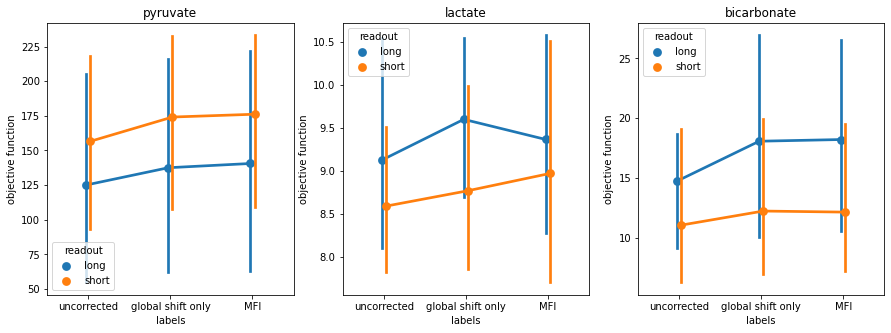

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

sns.pointplot(x="labels", y="objective function", hue="readout", data=df_pg , dodge=True, ax=ax1)
sns.pointplot(x="labels", y="objective function", hue="readout", data=df_lg , dodge=True, ax=ax2)
sns.pointplot(x="labels", y="objective function", hue="readout", data=df_bg , dodge=True,ax=ax3)
ax1.set_title('pyruvate')
ax2.set_title('lactate')
ax3.set_title('bicarbonate')


#ax1 = sns.catplot(x="labels", y="objective function", hue="readout", data=df_p , kind='point')

Text(0.5, 1.0, 'bicarbonate')

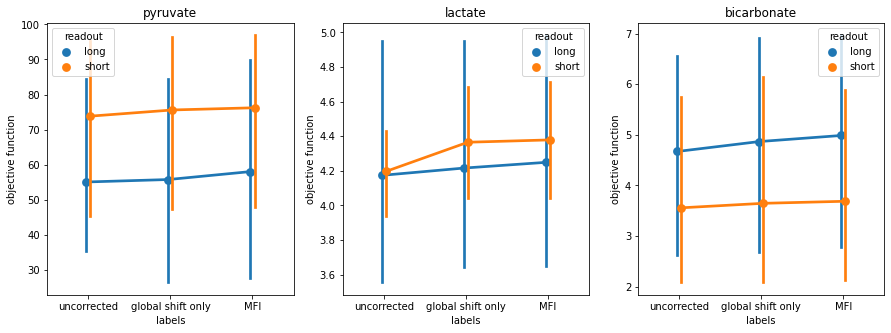

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

sns.pointplot(x="labels", y="objective function", hue="readout", data=df_pp , dodge=True, ax=ax1)
sns.pointplot(x="labels", y="objective function", hue="readout", data=df_lp , dodge=True, ax=ax2)
sns.pointplot(x="labels", y="objective function", hue="readout", data=df_bp , dodge=True,ax=ax3)
ax1.set_title('pyruvate')
ax2.set_title('lactate')
ax3.set_title('bicarbonate')



load the corrected and uncorrected images, generated in the previous notebook